# Hybrid attack

### Load results 

In [5]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from IPython.display import display
from itertools import product
from Graph import Graph

# parameters 

sns.set(font_scale=1.2)
sns.set_theme(style="whitegrid")

log_columns = ["expe","attack_type","optim","alpha","beta","gamma","graph1_prop","common_prop",
        "iter_number","epsilon","impossible_edges","reconstructed_edges","unknown_edges",
        "TP","FP","TN","FN","G2_distance","time"]

graph_stats = {
    "netscience": (379, 914, 14662),
    "bio-diseasome": (516, 1188, 21332),
    "cora": (2485, 5069, 113964),
    "polblogs": (1490, 16715, 2716480),
    "cora_logs": (2485, 5069),
    "email" : (143, 623)
}

epsilons = [1, 1.5, 2, 2.5, 3]
# epsilons = [0.1, 0.2, 0.5, 0.8, 1.0 ]


# Results

------ Dataset is netscience
0.13376403673045997
0.014061444852096544
0.012485293196232273
0.012226314213908285
0.01204669975842552


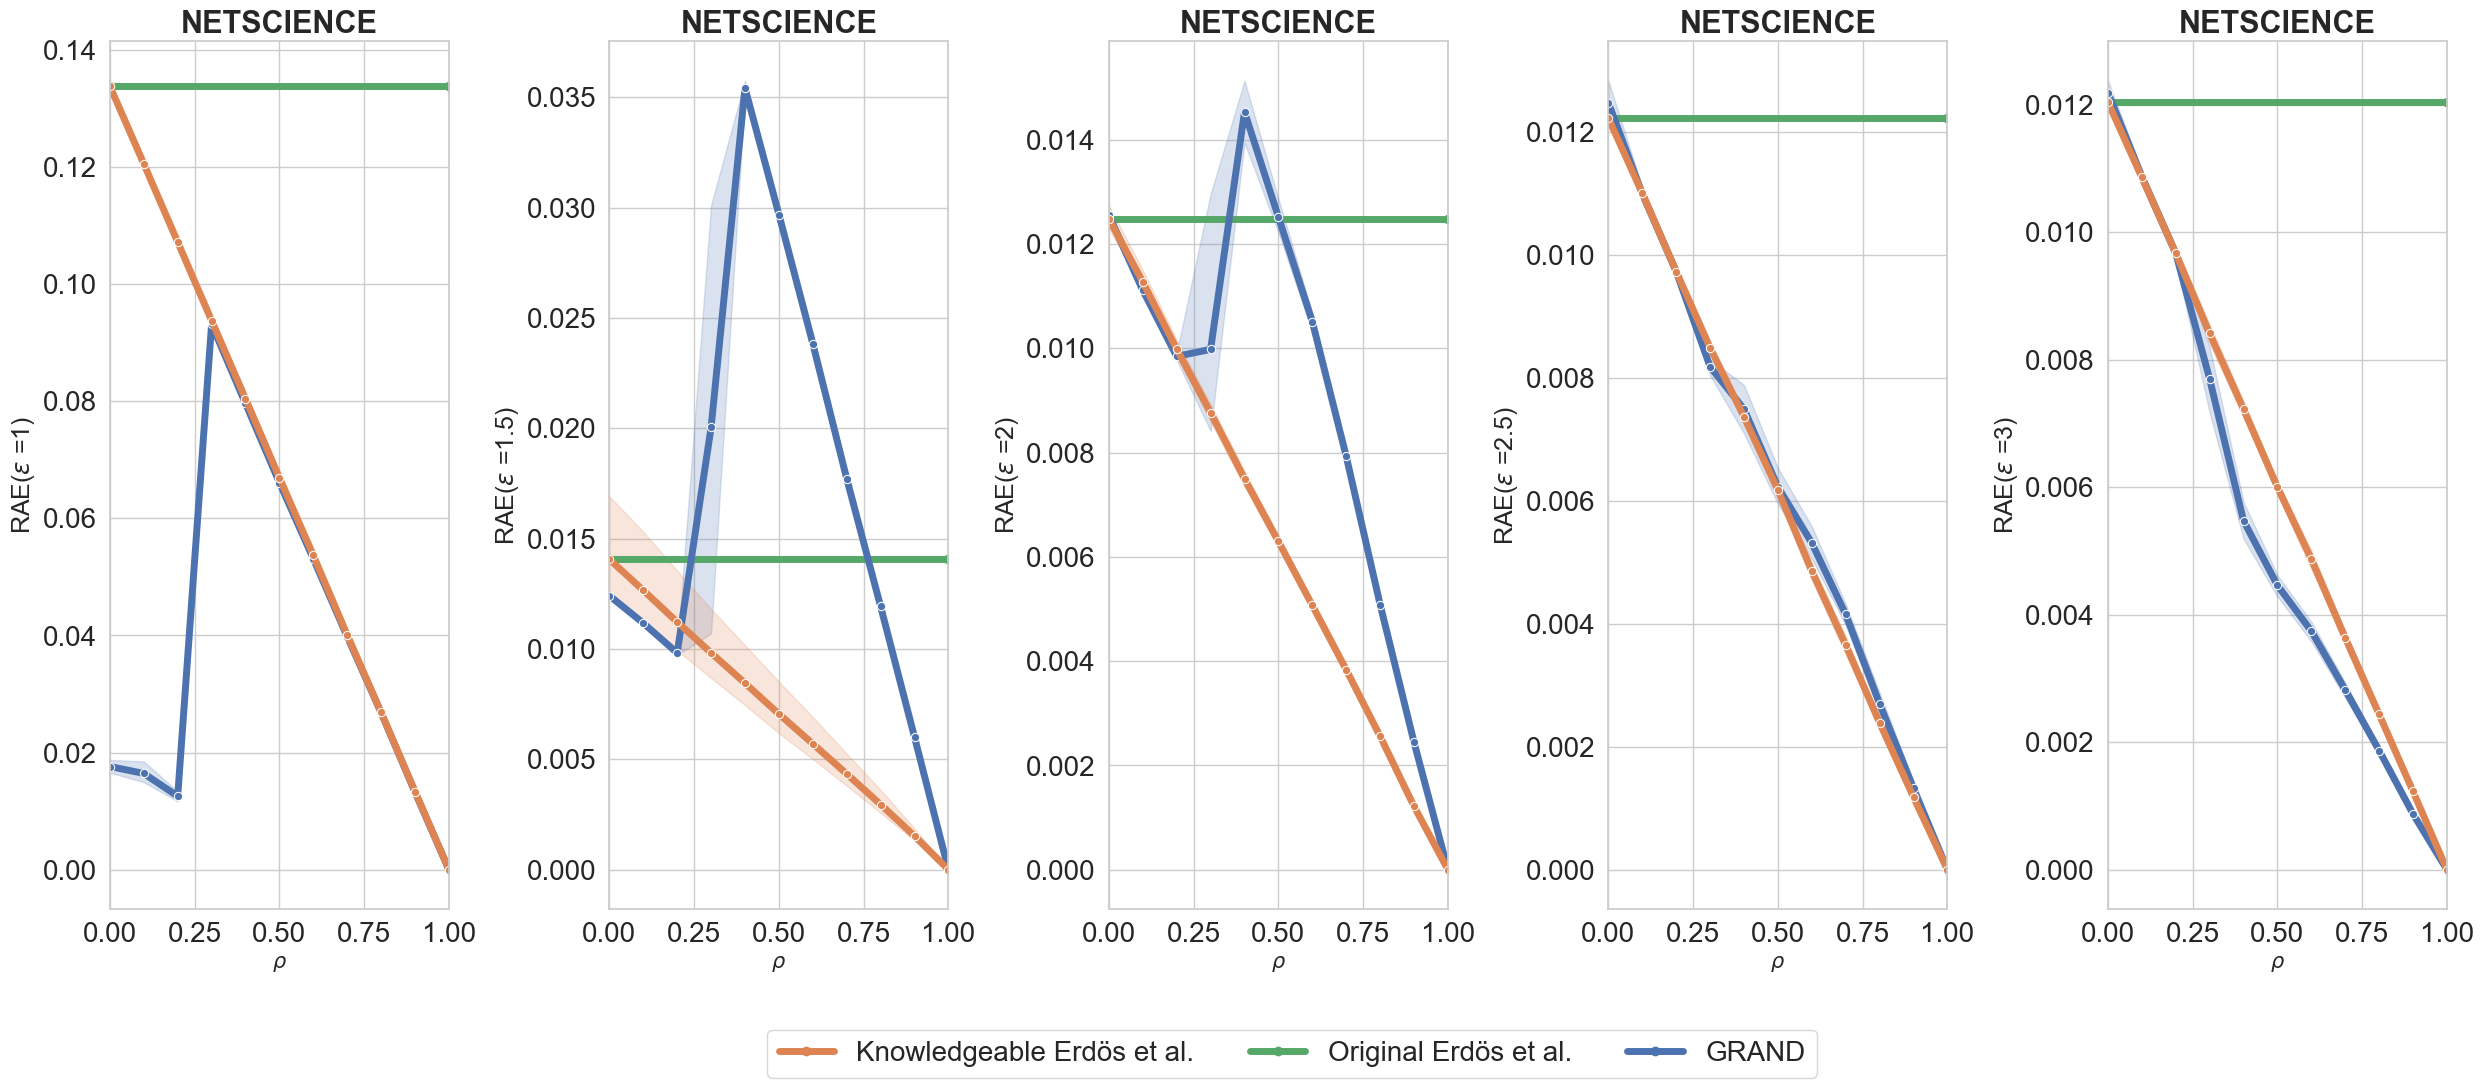

------ Dataset is netscience
58.85734551902878
1.1114445505388075
0.9883781203110079
0.9840812985950074
0.9751057154549173


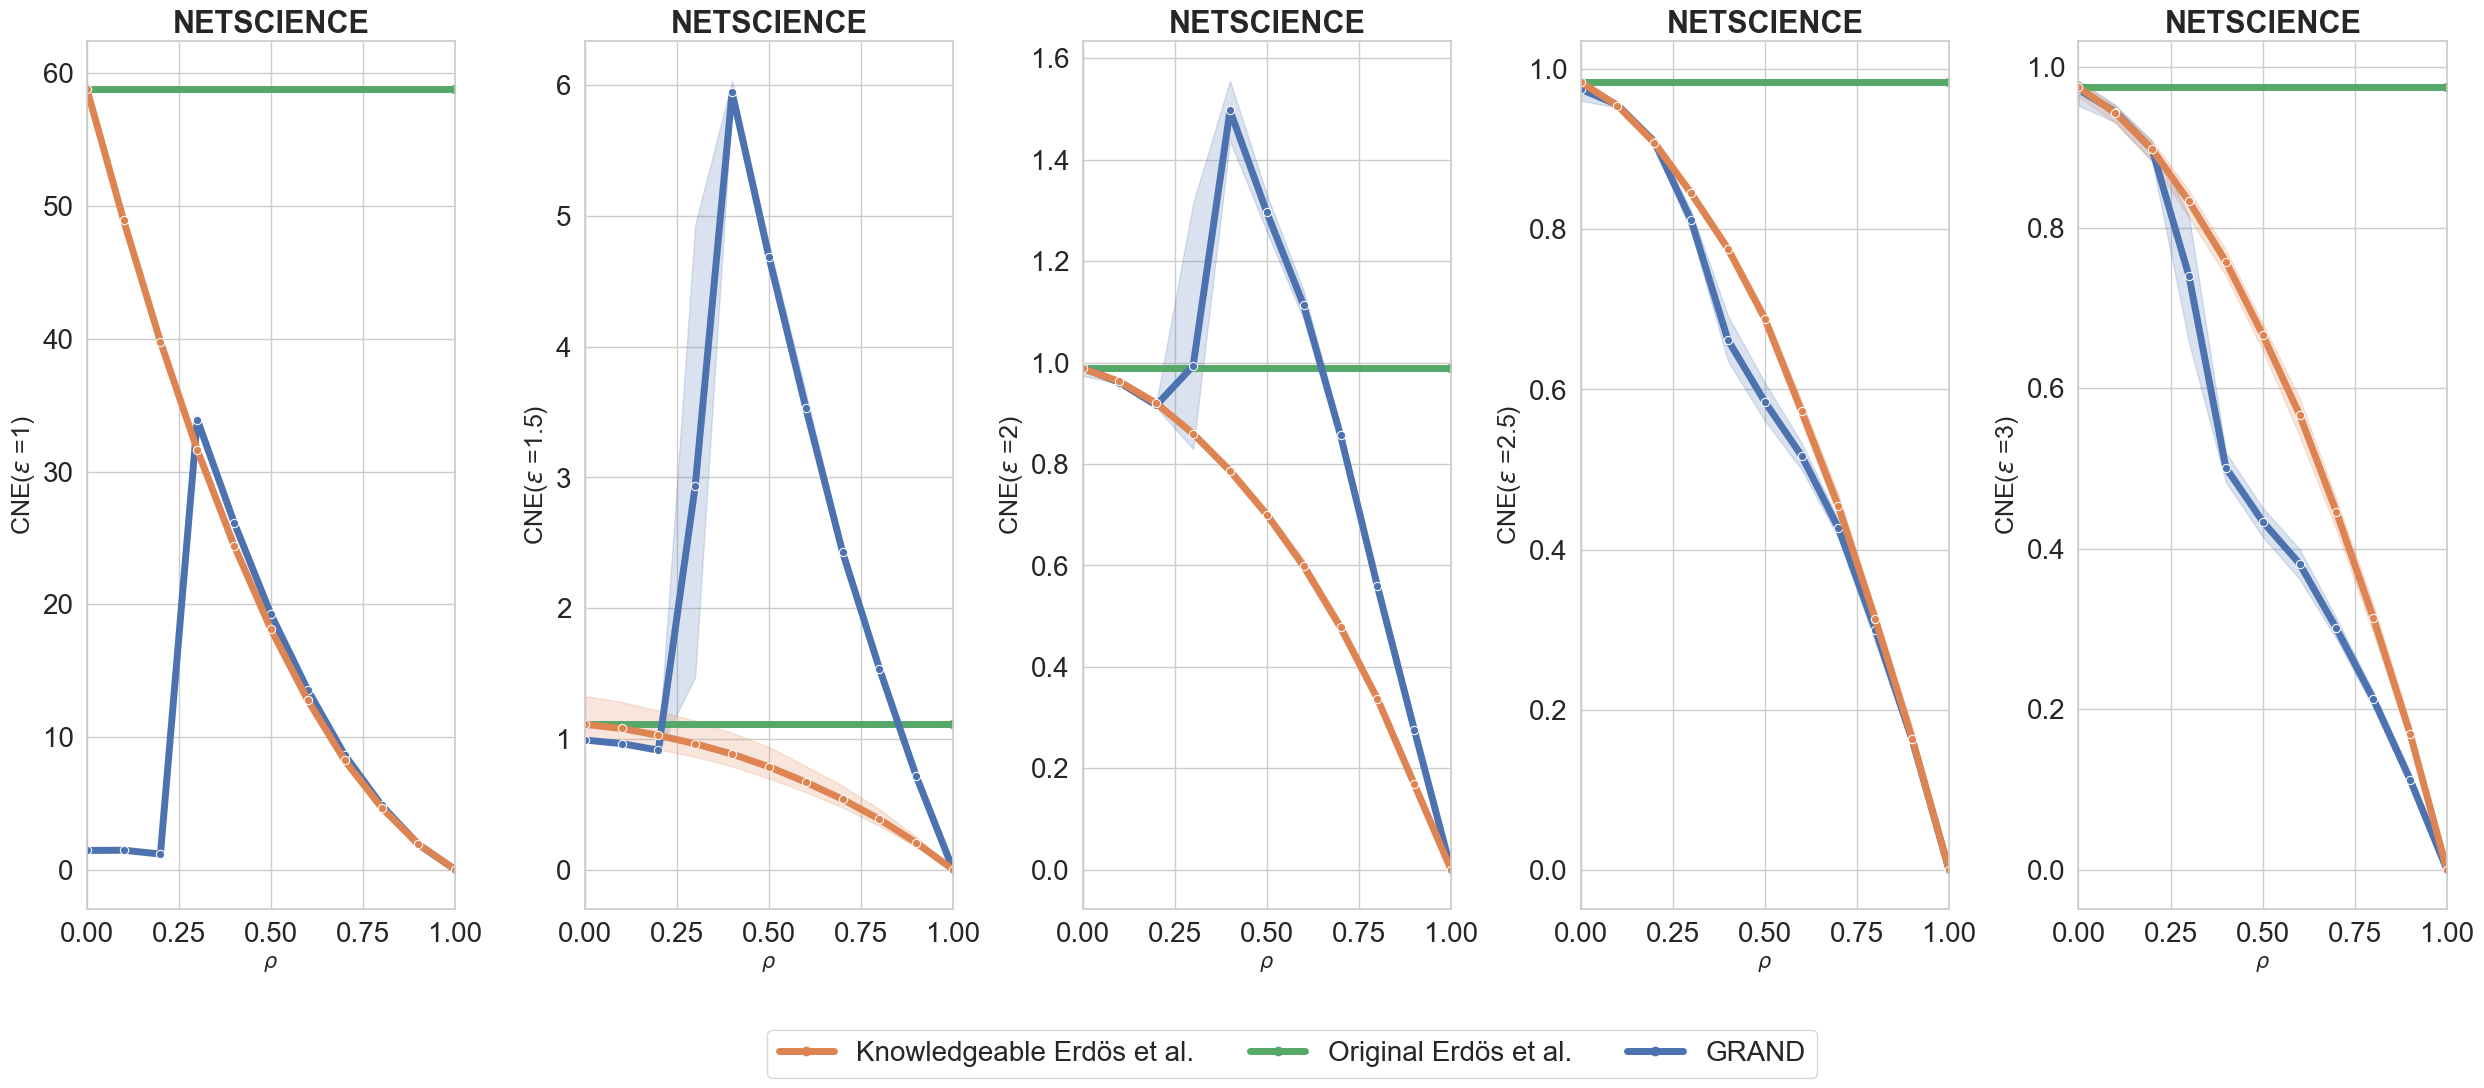

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D


colors = color=sns.color_palette()
sns.set_theme(style="whitegrid")

def plot_rae(datasets):

    fig = plt.figure(figsize=(25, 10))
    # 
    for i, result in enumerate(datasets):
        print("------ Dataset is", result)
        raw_data = pd.read_csv(f"logs/benchmark_with_defense/{result}.csv")
        number_of_nodes = graph_stats[result][0]
        raw_data.columns = log_columns

        for j, epsilon in enumerate(epsilons):
            data = raw_data.copy()
            data = data[data["epsilon"] == epsilon]
            
            data["attack_type"] = data["attack_type"].replace("H", "Erdos et al.")
            data["attack_type"] = data["attack_type"].replace("DH.*", "GRAND", regex=True)
            data.loc[:, "RAE"] = (data["FP"] + data["FN"]) / (number_of_nodes ** 2)

            ours = data[data["attack_type"] == "GRAND"].copy()
            erdos_et_al = data[data["attack_type"] == "Erdos et al."].copy()
            basic_erdos_et_al = data[(data["attack_type"] == "Erdos et al.") & (data["graph1_prop"] == 0.0)]
            basic_erdos_et_al = np.mean(basic_erdos_et_al["RAE"])
            print(basic_erdos_et_al)

            ax = fig.add_subplot(len(datasets), len(epsilons), i * len(epsilons) + j + 1)  

            line1 = ax.axhline(y=basic_erdos_et_al, color=colors[2], marker='o', linewidth=5)
            line2 = sns.lineplot(data=ours, x='graph1_prop', y='RAE', ax=ax, color=colors[0], marker='o', linewidth=5)
            line3 = sns.lineplot(data=erdos_et_al, x="graph1_prop", y="RAE", ax=ax, color=colors[1], marker='o', linewidth=5)
            
            ax.set_title(result.upper(), fontdict={'fontsize': 22, 'fontweight': 'bold'})
            ax.set_xlabel(r"$\rho$", fontsize=15)
            ax.set_ylabel(r"RAE($\epsilon$ =" + f"{epsilon})", fontsize=18)
            ax.set_xlim(0, 1)
            ax.tick_params(axis='both', which='major', labelsize=20)

    custom_legend = [
        Line2D([0], [0], color=colors[1], marker='o', linestyle='-', label="Knowledgeable Erdös et al.", linewidth=5),
        Line2D([0], [0], color=colors[2], marker='o', linestyle='-', label="Original Erdös et al.", linewidth=5),
        Line2D([0], [0], color=colors[0], marker='o', linestyle='-', label="GRAND", linewidth=5),
    ]

    fig.legend(handles=custom_legend, loc='lower center', fontsize=20, ncol=3, bbox_to_anchor=(0.52, -0.1))

    plt.tight_layout() 
    plt.show()



def plot_g2_distance(datasets):
    colors = color=sns.color_palette()

    fig = plt.figure(figsize=(25, 10))
    # 
    for i, result in enumerate(datasets):
        print("------ Dataset is", result)
        raw_data = pd.read_csv(f"logs/benchmark_with_defense/{result}.csv")
        number_of_nodes = graph_stats[result][0]
        raw_data.columns = log_columns

        for j, epsilon in enumerate(epsilons):
            data = raw_data.copy()
            data = data[data["epsilon"] == epsilon]
            
            data["attack_type"] = data["attack_type"].replace("H", "Erdos et al.")
            data["attack_type"] = data["attack_type"].replace("DH.*", "GRAND", regex=True)
            data.loc[:, "RAE"] = (data["FP"] + data["FN"]) / (number_of_nodes ** 2)

            ours = data[data["attack_type"] == "GRAND"].copy()
            erdos_et_al = data[data["attack_type"] == "Erdos et al."].copy()
            basic_erdos_et_al = data[(data["attack_type"] == "Erdos et al.") & (data["graph1_prop"] == 0.0)]
            basic_erdos_et_al = np.mean(basic_erdos_et_al["G2_distance"])
            print(basic_erdos_et_al)

            ax = fig.add_subplot(len(datasets), len(epsilons), i * len(epsilons) + j + 1)  

            line1 = ax.axhline(y=basic_erdos_et_al, color=colors[2], marker='o', linewidth=5)
            line2 = sns.lineplot(data=ours, x='graph1_prop', y='G2_distance', ax=ax, color=colors[0], marker='o', linewidth=5)
            line3 = sns.lineplot(data=erdos_et_al, x="graph1_prop", y="G2_distance", ax=ax, color=colors[1], marker='o', linewidth=5)
            
            ax.set_title(result.upper(), fontdict={'fontsize': 22, 'fontweight': 'bold'})
            ax.set_xlabel(r"$\rho$", fontsize=15)
            ax.set_ylabel(r"CNE($\epsilon$ =" + f"{epsilon})", fontsize=18)
            ax.set_xlim(0, 1)
            ax.tick_params(axis='both', which='major', labelsize=20)

    custom_legend = [
        Line2D([0], [0], color=colors[1], marker='o', linestyle='-', label="Knowledgeable Erdös et al.", linewidth=5),
        Line2D([0], [0], color=colors[2], marker='o', linestyle='-', label="Original Erdös et al.", linewidth=5),
        Line2D([0], [0], color=colors[0], marker='o', linestyle='-', label="GRAND", linewidth=5),
    ]

    fig.legend(handles=custom_legend, loc='lower center', fontsize=20, ncol=3, bbox_to_anchor=(0.52, -0.1))

    plt.tight_layout() 
    plt.show()


# datasets = ['barabasi_100_1', 'barabasi_100_2','barabasi_100_3','barabasi_100_4']
# datasets = ["random_100_0.25", "random_100_0.5", "random_100_0.75", "random_100_1"]
datasets = ["netscience"]

plot_rae(datasets)
plot_g2_distance(datasets)
